In [1]:
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import gridspec
import matplotlib.dates as mdates

import numpy as np
import pandas as pd

import os
import glob
import datetime

import pylab

from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy.io import fits
from astropy.wcs import WCS


plt.rcParams['font.size']=16
plt.rcParams['axes.labelsize']='large'
plt.rcParams['axes.titlesize']='large'
pylab.rcParams['legend.loc'] = 'best'
matplotlib.rcParams['text.usetex'] = False

%matplotlib inline

In [2]:
flux_ratio = pd.DataFrame([])



for csvfile in np.append(glob.glob("/data/*Candidates/AARTFAAC_cat_flux2.csv"),
                         glob.glob("/mnt/ais001/*Candidates/AARTFAAC_cat_flux2.csv")):


    if len(flux_ratio) == 0:
        flux_ratio = pd.concat([flux_ratio,pd.read_csv(csvfile)], ignore_index=True)
    else:
        flux_ratio = pd.concat([flux_ratio,pd.read_csv(csvfile)], ignore_index=True)


In [2]:
vlssr = pd.read_csv("/home/kuiack/VLSSr_gt_5.csv", comment="#")
tgss = pd.read_csv("/home/kuiack/TGSSADR1_7sigma_catalog.tsv", delimiter="\t")
aart = pd.read_csv("/home/kuiack/AARTFAAC_catalogue.csv")
ateam = {"ra":np.array([82.88,299.43,350.28,187.07]),
         "decl":np.array([21.98,40.59,58.54,12.66])}
aart_coord = SkyCoord(aart.ra.values*u.deg, aart.decl.values*u.deg, frame='fk5')


In [4]:
test = pd.DataFrame([],columns=flux_ratio.keys())

_id = 0


while len(flux_ratio) > 0: 
#     print len(flux_ratio)
    c1 = SkyCoord(flux_ratio.iloc[0].ra*u.deg, flux_ratio.iloc[0].decl*u.deg, frame='fk5')
    c2 = SkyCoord(flux_ratio.ra.values*u.deg, flux_ratio.decl.values*u.deg, frame='fk5')
    
    

    index = np.where(c1.separation(c2).deg < 1)[0]
#     print index
    flux_ratio.iloc[index]
    data = pd.DataFrame({"ra":np.mean(flux_ratio.iloc[index].ra),
            "decl":np.mean(flux_ratio.iloc[index].decl),
            "mode_lo":np.mean(flux_ratio.iloc[index].mode_lo),
            "mode_lo_err":np.mean(flux_ratio.iloc[index].mode_lo_err),
            "mode_hi":np.mean(flux_ratio.iloc[index].mode_hi),
            "mode_hi_err":np.mean(flux_ratio.iloc[index].mode_hi_err),
            "N":np.sum(flux_ratio.iloc[index].N)},
                        index=[aart.iloc[np.where(c1.separation(aart_coord).deg == np.min(c1.separation(aart_coord).deg))[0]].index[0]])

    test = pd.concat([test,data])

    flux_ratio = flux_ratio.drop(index=flux_ratio.iloc[index].index)
    
test["alph"] = np.log10(test["mode_lo"]/test["mode_hi"])/np.log10(58300781.25/61816406.25)

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  1.,  2.,  4.,  1.,  0.,
         1.,  5.,  4.,  3.,  6.,  5.,  9., 13.,  6., 17.,  9., 11.,  7.,
         9., 12.,  6.,  5.,  4.,  3.,  5.,  3.,  1.,  0.,  1.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.34008573, -2.23242143, -2.12475713, -2.01709283, -1.90942853,
        -1.80176424, -1.69409994, -1.58643564, -1.47877134, -1.37110704,
        -1.26344274, -1.15577845, -1.04811415, -0.94044985, -0.83278555,
        -0.72512125, -0.61745696, -0.50979266, -0.40212836, -0.29446406,
        -0.18679976, -0.07913546,  0.02852883,  0.13619313,  0.24385743,
         0.35152173,  0.45918603,  0.56685033,  0.67451462,  0.78217892,
         0.88984322,  0.99750752,  1.10517182,  1.21283611,  1.32050041,
         1.42816471,  1.53582901,  1.64349331,  1.75115761,  1.8588219 ,
         1.9664862 ,  2.0741505 ,  2.1818148 ,  2.2894791 ,  2.3971434 ,
         2.50480769,  2.61247199,  2.72013629,  2.82780059,

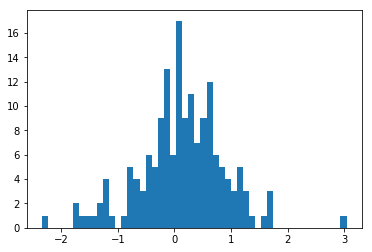

In [24]:
plt.hist(test["alph"], bins=50)

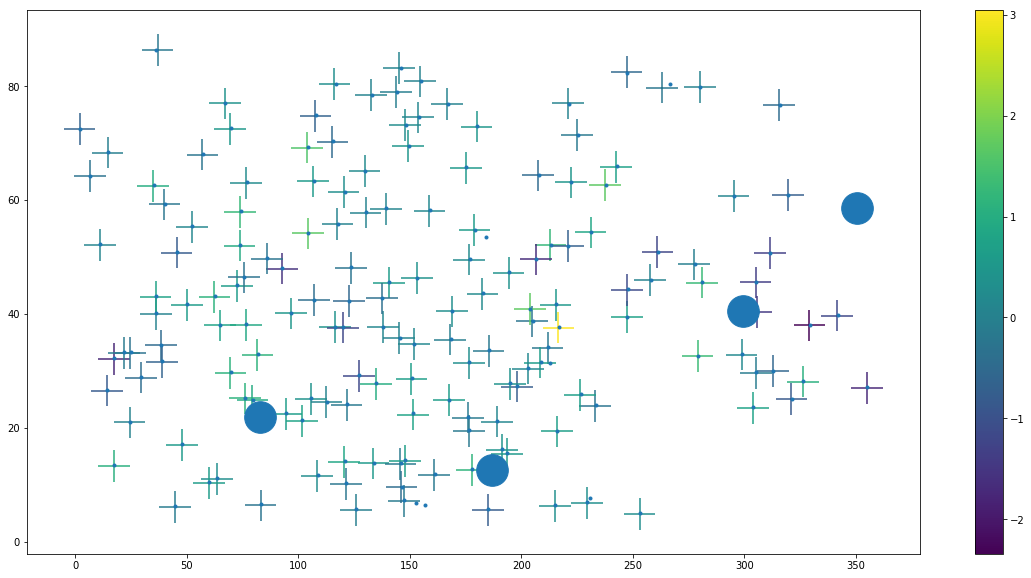

In [21]:
plt.figure(figsize=(20,10))
plt.plot(aart.ra, aart.decl, ".")

plt.scatter(test.ra, test.decl, marker="+", c=test.alph, s=1000)
plt.colorbar()

plt.scatter(ateam["ra"],ateam["decl"], marker="o", s=1000)



In [11]:
test.sort_values("alph")


,N,decl,mode_hi,mode_hi_err,mode_lo,mode_lo_err,ra,alph
83,121796,37.985800,44.878156,0.142625,51.468550,0.132268,329.165639,-2.340086
115,161543,32.141731,30.098369,0.108397,33.359211,0.090839,17.443283,-1.756740
73,109298,27.013607,61.594529,0.178281,68.183320,0.181488,354.881799,-1.735630
44,12362,49.565865,51.919255,0.312637,57.303996,0.301765,206.486054,-1.685313
66,146732,47.952755,30.780815,0.252940,33.731622,0.174345,92.700951,-1.563432
29,70683,40.336843,310.352803,0.461056,337.989542,0.443841,305.448009,-1.456881
105,130597,45.548498,112.692501,0.150534,122.098866,0.173143,305.039197,-1.369149
102,153742,50.650883,113.908836,0.211990,123.051937,0.184492,311.468911,-1.318595
110,14253,50.841126,19.141966,0.184106,20.558171,0.109329,260.975105,-1.218981
87,36350,37.610418,27.141740,0.254262,29.117821,0.143993,119.938537,-1.200233


In [22]:
target_ra = 273.5
target_decl = 26.5

# target_ra = 148.56
# target_decl = 7.66

radius = 10



# IDS = np.unique(data[(data.ra > target_ra-radius) &  (data.ra < target_ra+radius) &
#                      (data.decl > target_decl-radius) &  (data.decl < target_decl+radius) &
#                      (data.extract_type == 2)].runcatid )
test[(test.ra > target_ra-radius) &  (test.ra < target_ra+radius) &
     (test.decl > target_decl-radius) &  (test.decl < target_decl+radius) ]


,N,decl,mode_hi,mode_hi_err,mode_lo,mode_lo_err,ra,alph
22,14248,32.57654,20.833992,0.147825,19.275953,0.170124,279.01033,1.327466


In [29]:
len(vlssr[(vlssr.Sp > 16) & (vlssr._DEJ2000 > 0)  ])

280

In [14]:
def align_prob(Nsources):
    density = Nsources/206265.
    no_expect = density * 0.2
    return no_expect


In [33]:
align_prob(280)

0.0002714954063946865